In [1]:
import urllib
from bs4 import BeautifulSoup
import re
import numpy as np
import sys
import pandas as pd

from PIL import Image
import requests 
import codecs
from six.moves.urllib.request import urlopen
import json

from sklearn.linear_model import LinearRegression as LR


from matplotlib import colors
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_html(url):
    try:
        fp = urllib.request.urlopen(url)
        return fp.read().decode("utf8")
    except:
        return -1


In [4]:
import_t=dict()
for year in range (2013,2021):
    link='https://ru-stat.com/date-Y{0}-{0}/RU/{1}/PK'.format(year,'import')
    twt=get_html(link)
    if twt!=-1:
        for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
            s1=int(el.split(' : ')[0].split('>')[1])
            s2=el.split(' : ')[1].split('</a')[0]
            s3=el.split('<td>')[1].split('</td')[0]
            res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
            d1=import_t.get(s1,dict())
            d1[year]=res
            import_t[s1]=d1


In [5]:
export_t=dict()
for year in range (2013,2021):
    link='https://ru-stat.com/date-Y{0}-{0}/RU/{1}/PK'.format(year,'export')
    twt=get_html(link)
    if twt!=-1:
        for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
            s1=int(el.split(' : ')[0].split('>')[1])
            s2=el.split(' : ')[1].split('</a')[0]
            s3=el.split('<td>')[1].split('</td')[0]
            res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
            d1=export_t.get(s1,dict())
            d1[year]=res
            export_t[s1]=d1


In [6]:
export_r=dict()
for year in range (2013,2021):
    for r in range(1,100):
        link='https://ru-stat.com/date-Y{0}-{0}/RU{1}000/{2}/PK'.format(year,str(r) if r>9 else '0'+str(r),'export')
        twt=get_html(link)
        if twt!=-1:
            if twt.find('Группа товара')>=0:
                s0=twt.split('data-target="#myModalRegion">')[1].split('</button>')[0]
                d0=export_r.get(s0,dict())
                for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
                    s1=int(el.split(' : ')[0].split('>')[1])
                    s2=el.split(' : ')[1].split('</a')[0]
                    s3=el.split('<td>')[1].split('</td')[0]
                    res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
                    d1=d0.get(s1,dict())
                    d1[year]=res
                    d0[s1]=d1
                export_r[s0]=d0


In [7]:
import_r=dict()
for year in range (2013,2021):
    for r in range(1,100):
        link='https://ru-stat.com/date-Y{0}-{0}/RU{1}000/{2}/PK'.format(year,str(r) if r>9 else '0'+str(r),'import')
        twt=get_html(link)
        if twt!=-1:
            if twt.find('Группа товара')>=0:
                s0=twt.split('data-target="#myModalRegion">')[1].split('</button>')[0]
                d0=import_r.get(s0,dict())
                for el in twt.split('Группа товара')[1].split('Итого')[0].split('title=')[1:]:
                    s1=int(el.split(' : ')[0].split('>')[1])
                    s2=el.split(' : ')[1].split('</a')[0]
                    s3=el.split('<td>')[1].split('</td')[0]
                    res=0 if s3=='---' else float(s3[1:].split(' ')[0])*(1e6 if s3.find('млн')>=0 else 1e9 if s3.find('млрд')>=0 else 1e3 if s3.find('тыс')>=0 else 1)
                    d1=d0.get(s1,dict())
                    d1[year]=res
                    d0[s1]=d1
                import_r[s0]=d0


In [8]:
with open('import_t_pk.json', 'w') as fp:
    json.dump(import_t, fp)
with open('import_r_pk.json', 'w') as fp:
    json.dump(import_r, fp)
with open('export_t_pk.json', 'w') as fp:
    json.dump(export_t, fp)
with open('export_r_pk.json', 'w') as fp:
    json.dump(export_r, fp)

In [9]:
df=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='CO2',usecols='A:P',nrows=28, engine='openpyxl')
df.head()

ID                               Product  ID Analogue  \
0  1.0     Продукты животного происхождения           1.0   
1  2.0  Продукты растительного происхождения          1.0   
2  3.0                          Жиры и масла          1.0   
3  4.0      Пищевые продукты, напитки, табак          6.0   
4  5.0                  Минеральные продукты          2.0   

                                            Analogue  \
0  Agriculture, forestry, animal husbandry and fi...   
1  Agriculture, forestry, animal husbandry and fi...   
2  Agriculture, forestry, animal husbandry and fi...   
3                                   Food and tobacco   
4                               Coal mining products   

                                        Emission     2005     2010     2011  \
0                             Сельское хозяйство  104.900  103.500  106.200   
1                             Сельское хозяйство  104.900  103.500  106.200   
2                             Сельское хозяйство  104.900  103.500  106.200   
3  производство и использование другой продукции    0.867    1.046    1.079   
4   производство продукции из минерального сырья   36.201   36.516   39.453   

      2012     2013     2014     2015     2016     2017     2018     2019  
0  105.200  107.700  107.500  108.600  112.500  113.100  112.800  114.200  
1  105.200  107.700  107.500  108.600  112.500  113.100  112.800  114.200  
2  105.200  107.700  107.500  108.600  112.500  113.100  112.800  114.200  
3    1.092    1.121    1.222    1.231    1.288    1.397    1.443    1.581  
4   41.440   42.865   42.406   39.409   35.581   36.106   36.896   36.324

In [10]:
course=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='Course',usecols='A:H',nrows=3, engine='openpyxl')
course

Fin     2013     2014     2015     2016     2017     2018     2019
0  USD  31.8480  38.4217  60.9579  67.0349  58.3529  62.7078  64.7362
1  CNY   5.1814   6.2363   9.6933  10.1062   8.6355   9.4723   9.3760

In [11]:
CO2=df.loc[0:21]
coef=df[df.columns[5:]].loc[26]/df[df.columns[5:]].loc[25]
CO2m=np.array(CO2[range(2013,2020)])
export=pd.DataFrame(export_t).T
ems=np.array(CO2.Emission)

In [12]:
for el in range(2013,2020):
    CO2[el]=[CO2m[x-1,el-2013]*coef[el]*export[el].loc[x]/export[el][ems==ems[x-1]].sum() for x in range(1,23)]
#list(map(lambda x:x[1]*coef[el],np.array(CO2[['Emission',el]]))))

In [13]:
CO2[['Product']+list(range(2013,2020))]

Product       2013          2014       2015  \
0      Продукты животного происхождения    0.000000  0.000000e+00   0.249765   
1   Продукты растительного происхождения  85.587094  8.558857e+01  86.330450   
2                           Жиры и масла   0.000000  0.000000e+00   0.000000   
3       Пищевые продукты, напитки, табак   0.000000  0.000000e+00   0.000027   
4                   Минеральные продукты  34.063981  3.376250e+01  31.418413   
5    Продукция химической промышленности  35.090934  3.188194e+01  34.502845   
6            Пластмассы, каучук и резина  12.584335  1.370133e+01   9.857956   
7                 Изделия из кожи и меха   0.000015  2.423364e-05   0.000366   
8             Древесина и изделия из нее   0.014114  2.630008e-02   0.025619   
9                  Книги, бумага, картон   0.471143  6.781663e-01   0.770455   
10                              Текстиль   0.000082  1.392025e-03   0.000700   
11    Обувь, головные уборы, зонты и др,   0.000000  7.514308e-07   0.000000   
12   Изделия из камня, керамики и стекла   0.000137  2.404578e-03   0.000249   
13                         Драгоценности   0.000000  0.000000e+00   0.000000   
14              Металлы и изделия из них  83.138683  8.455514e+01  85.799718   
15    Машины, оборудование и аппаратура    0.178709  1.108360e-01   0.091593   
16                             Транспорт   0.003188  8.021523e-03   0.005684   
17          Инструменты и аппараты, часы   0.001761  6.456647e-04   0.000256   
18                   Оружие и боеприпасы   0.000000  0.000000e+00   0.000000   
19            Разные промышленные товары   0.000062  3.005723e-03   0.000504   
20  Произведения искусства и антиквариат   0.000000  0.000000e+00   0.000000   
21                       Скрытый раздел    0.058893  9.017169e-02   0.051184   

            2016       2017       2018       2019  
0   0.000000e+00   0.025399   0.012202   0.000000  
1   8.938371e+01  89.870401  89.419969  90.491403  
2   0.000000e+00   0.000000   0.000000   0.000000  
3   6.781602e-04   0.000000   0.000120   0.000000  
4   2.826988e+01  28.698300  29.252565  28.782922  
5   3.736650e+01  47.143636  54.123940  45.289852  
6   8.381272e+00   7.702340   7.543823  11.623059  
7   1.532432e-03   0.000096   0.000412   0.004551  
8   4.994203e-02   0.028060   0.011830   0.067596  
9   7.806728e-01   0.491056   0.250293   0.973379  
10  6.755317e-04   0.002245   0.002584   0.005318  
11  3.942792e-07   0.000000   0.000001   0.000000  
12  1.266951e-03   0.001472   0.001270   0.008247  
13  0.000000e+00   0.000000   0.000000   0.000000  
14  8.529908e+01  85.792864  84.687033  83.156211  
15  9.988407e-02   0.076387   0.035489   0.112660  
16  2.891381e-02   0.035855   0.018056   0.003294  
17  4.851961e-04   0.000137   0.000426   0.000380  
18  0.000000e+00   0.000000   0.000000   0.000000  
19  6.098185e-04   0.000058   0.000909   0.000536  
20  0.000000e+00   0.000000   0.000000   0.000000  
21  3.417086e-02   0.464555   0.790726   0.054077

In [14]:
dfd=pd.read_excel('https://github.com/rufimich/CO2_Russia-China/raw/main/RassianData.xlsx',sheet_name='Value',usecols='A:S',nrows=23, engine='openpyxl')
valm=np.array(dfd[range(2013,2020)])
vals=np.array(dfd.Analogue)

In [15]:
for el in range(2013,2020):
    dfd[el]=[valm[x-1,el-2013]/course.loc[0][el]*export[el].loc[x]/export[el][vals==vals[x-1]].sum() for x in range(1,23)]

dfd[['Product']+list(range(2013,2020))]

Product           2013           2014  \
0      Продукты животного происхождения        0.000000       0.000000   
1   Продукты растительного происхождения  134130.118061  125971.104870   
2                           Жиры и масла       0.000000       0.000000   
3       Пищевые продукты, напитки, табак       0.000000       0.000000   
4                   Минеральные продукты  189359.174830  178233.316069   
5    Продукция химической промышленности   59225.571464   54717.021891   
6            Пластмассы, каучук и резина   21048.511680   18006.803447   
7                 Изделия из кожи и меха    1661.674202    1266.728363   
8             Древесина и изделия из нее   11848.342125   10294.390930   
9                  Книги, бумага, картон   24046.093946   21448.218064   
10                              Текстиль    7625.596584    6871.299292   
11    Обувь, головные уборы, зонты и др,       0.000000      39.278399   
12   Изделия из камня, керамики и стекла   38227.832203   32634.422735   
13                         Драгоценности       0.000000       0.000000   
14              Металлы и изделия из них  124174.076865  118809.839231   
15    Машины, оборудование и аппаратура    42456.103994   35742.796388   
16                             Транспорт   99271.539814   82763.073992   
17          Инструменты и аппараты, часы   48223.687516   44656.535239   
18                   Оружие и боеприпасы       0.000000       0.000000   
19            Разные промышленные товары      43.687797    1307.657375   
20  Произведения искусства и антиквариат       0.000000       0.000000   
21                       Скрытый раздел    41403.467441   39229.721242   

             2015           2016           2017           2018           2019  
0      287.512365       0.000000      30.753225      14.782648       0.000000  
1    99377.624920   96476.143565  108813.999992  108334.149961  114987.966547  
2        0.000000       0.000000       0.000000       0.000000       0.000000  
3        3.830970      66.910874       0.000000      41.650380       0.000000  
4   115835.568483  101710.735751  140572.362299  165807.363677  158390.801666  
5    45389.260457   38096.364729   47000.114819   52080.171845   50674.052709  
6    15009.457347   14186.834022   17474.538541   18506.836470   18823.361052  
7     1066.145651    1088.704879    1311.468667    1274.170349    1178.876454  
8     8316.707104    7781.573479    9402.223369   10736.925869   11033.709752  
9    17961.986879   14421.368571   17549.084964   18899.451105   18764.602598  
10    5800.888810    5397.024535    6432.156757    6748.474671    6736.914177  
11       0.000000       0.280113       0.000000       3.469753       0.000000  
12   22873.458567   19564.570097   24742.300725   25562.561595   27064.399917  
13       0.000000       0.000000       0.000000       0.000000       0.000000  
14   93999.990157   67632.979239   88521.872949   97270.339575  109481.499679  
15   28035.299772   25110.725905   36436.132566   40658.977033   41867.110418  
16   51035.780432   50005.519513   71175.057281   75154.542178   77042.472857  
17   36190.255898   31860.881421   38080.489573   37613.295316   39557.203489  
18       0.000000       0.000000       0.000000       0.000000       0.000000  
19     335.916239     568.074574       4.911424      44.855362     411.545707  
20       0.000000       0.000000       0.000000       0.000000       0.000000  
21   34130.526994   31831.764913   39344.204044   39018.020389   41500.407465

In [16]:
exportCO2=export.copy()
for el in range(2013,2020):
    exportCO2[el]=exportCO2[el]*np.array(CO2[el]/dfd[el])
exportCO2['Product']=np.array(CO2['Product'])
exportCO2[['Product']+list(range(2013,2020))]

Product          2013          2014  \
1      Продукты животного происхождения            NaN           NaN   
2   Продукты растительного происхождения  27948.344250  3.743660e+04   
3                           Жиры и масла           NaN           NaN   
4       Пищевые продукты, напитки, табак           NaN           NaN   
5                   Минеральные продукты   4083.522096  5.872289e+02   
6    Продукция химической промышленности   8591.196950  7.050302e+03   
7            Пластмассы, каучук и резина   3108.939174  3.956667e+03   
8                 Изделия из кожи и меха      0.000007  2.467885e-05   
9             Древесина и изделия из нее      0.827897  3.576715e+00   
10                 Книги, бумага, картон    454.564812  1.141438e+03   
11                              Текстиль      0.000044  1.501158e-02   
12    Обувь, головные уборы, зонты и др,           NaN  7.652356e-07   
13   Изделия из камня, керамики и стекла      0.000024  9.431331e-03   
14                         Драгоценности           NaN           NaN   
15              Металлы и изделия из них  44791.779779  1.402019e+04   
16    Машины, оборудование и аппаратура      37.041587  1.829551e+01   
17                             Транспорт      0.005042  4.138549e-02   
18          Инструменты и аппараты, часы      0.295767  4.048369e-02   
19                   Оружие и боеприпасы           NaN           NaN   
20            Разные промышленные товары      0.004353  3.677689e-01   
21  Произведения искусства и антиквариат           NaN           NaN   
22                       Скрытый раздел       4.124997  1.103307e+01   

            2015          2016          2017          2018          2019  
1      65.848304           NaN      7.656171      5.654051           NaN  
2   22760.231897  34465.247039  27089.796776  41435.525713  67128.038934  
3            NaN           NaN           NaN           NaN           NaN  
4       0.007173      0.261490           NaN      0.055682           NaN  
5     596.712309   1556.486110   6859.548158   7656.845338   1235.702262  
6    6917.404763  10495.006462  35608.403756  46973.771213  20198.713368  
7    1707.635660   1417.867626   2556.495247   2568.028733   3581.387236  
8       0.004674      0.082062      0.000451      0.021350      0.389944  
9       2.929481     12.194174      5.371990      2.093387      9.189444  
10   1226.757531   1607.751934    881.429085    532.384253   1120.460173  
11      0.003139      0.003217      0.050256      0.158896      0.093139  
12           NaN      0.000021           NaN      0.000058           NaN  
13      0.000101      0.003121      0.005615      0.010136      0.055761  
14           NaN           NaN           NaN           NaN           NaN  
15  18437.813589  47169.080441  79568.968313  78183.088628  15722.597687  
16     11.107944     15.115431     10.272606      4.975257      6.727215  
17      0.023500      0.636034      1.158640      0.696728      0.003126  
18      0.009197      0.014482      0.002439      0.058935      0.004930  
19           NaN           NaN           NaN           NaN           NaN  
20      0.028044      0.024905      0.043924      2.958787      0.015506  
21           NaN           NaN           NaN           NaN           NaN  
22      2.849346      1.395528    351.862117   2573.738961      1.563646

In [17]:
def get_predict (dct,base_year=2019,predict_year=2030):
    years=np.array(list(dct.keys()))
    values=np.array(list(dct.values()))
    if (np.sum(values>1e-10)<2) | ((dct.get(base_year,0)<1e-10) & (np.sum(values>1e-10)==2)):
        return 0
    elif np.sum(values>1e-10)==2:
        return np.mean(values[values>1e-10])
    else:
        X=years[values>1e-10].reshape(-1,1)
        y=values[values>1e-10]
        mdl1=LR().fit(X,y).predict([[predict_year]])[0]
        mdl2=np.exp(LR().fit(X,np.log(y)).predict([[predict_year]])[0])
        mdl3=mdl2 if np.abs(values[-1]-mdl2)<np.abs(values[-1]-mdl1) else mdl1
        return mdl3
        
    
    

In [29]:
exprt_predict=dict()
sumExprt=0
for el in export_r:
    exprt_pr2=dict()
    for pr in export_r[el]:
        ss1=get_predict(export_r[el][pr])
        sumExprt+=ss1
        exprt_pr2[pr]=ss1
    exprt_predict[el]=exprt_pr2

decrease_coef=0.8
predict_value=45e7

sum_Exprt_CO2_2030=0
Exprt_CO2_2030_product=dict()

for el in export_r:
    for pr in export_r[el]:
        exprt_predict[el][pr]=exprt_predict[el][pr]*CO2[2019].loc[pr-1]/dfd[2019].loc[pr-1]*predict_value/sumExprt*decrease_coef
        sum_Exprt_CO2_2030+=0 if np.isnan(exprt_predict[el][pr]) else exprt_predict[el][pr]
        Exprt_CO2_2030_product[pr]=Exprt_CO2_2030_product.get(pr,0)+exprt_predict[el][pr]
sum_Exprt_CO2_2030
        

127453.47659087955

In [30]:
products=['Animal husbandry and fishery products and services','Agriculture products and services',
          'Fats and oils','Food, beverages, tobacco','Mineral products','Chemical products',
          'Plastics, rubber and rubber','Leather and fur products','Wood work and furniture',
          'Books, paper, cardboard','textile','Shoes, hats, umbrellas, etc','Products made of stone, ceramics and glass',
          'Jewelry','Metal products, machinery and equipment repair services','Machinery, equipment','Transport',
          'Tools and devices, watches','Weapons and ammunition','Various industrial products','Works of art and antiques',
          'Special section']

In [31]:
clrs=list(colors.cnames.keys())[20:len(products)+20]

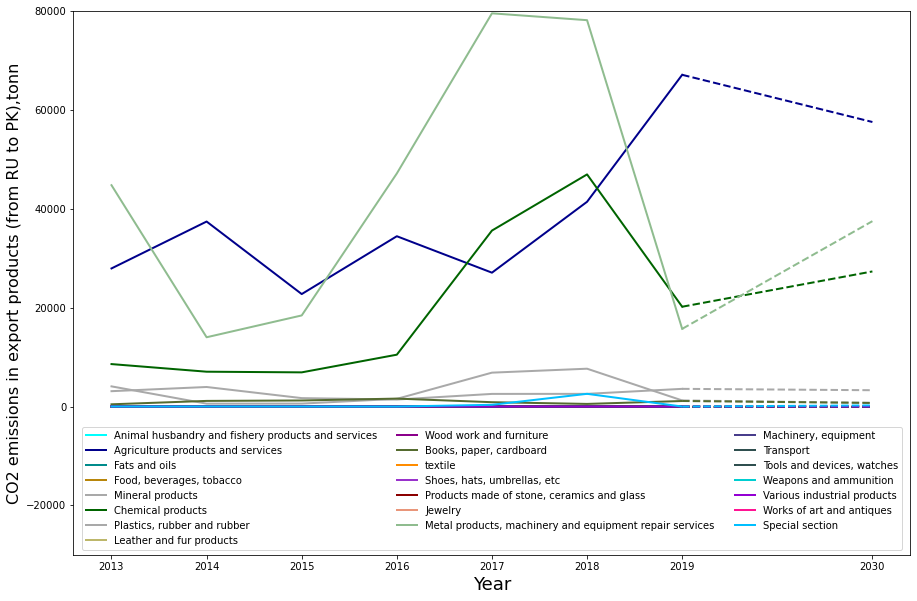

In [82]:
plt.figure(figsize=(15,10))
for num,el in enumerate(np.array(exportCO2[range(2013,2020)])):
    plt.plot(range(2013,2020),el,linewidth=2,color=clrs[num])
for num,el in enumerate(np.array(exportCO2[range(2013,2020)])):
    plt.plot([2019,2021],[el[-1],Exprt_CO2_2030_product[exportCO2.index[num]]],'--',linewidth=2,color=clrs[num])
    
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.xticks(list(range(2013,2020))+[2021],list(range(2013,2020))+[2030])
plt.ylabel('CO2 emissions in export products (from RU to PK),tonn',fontsize=16)
plt.ylim(-3e4,8e4)
plt.show()

In [34]:
imprt=pd.DataFrame(import_t).T
importCO2=imprt.copy()
for el in range(2013,2020):
    importCO2[el]=importCO2[el]*np.array(CO2[el]/dfd[el])
importCO2['Product']=np.array(CO2['Product'])
importCO2[['Product']+list(range(2013,2020))]

Product          2013          2014  \
1      Продукты животного происхождения            NaN           NaN   
2   Продукты растительного происхождения  73380.355909  54354.412346   
3                           Жиры и масла           NaN           NaN   
4       Пищевые продукты, напитки, табак           NaN           NaN   
5                   Минеральные продукты    162.981102    246.257273   
6    Продукция химической промышленности   8176.449511   4195.221078   
7            Пластмассы, каучук и резина   1674.044170   2054.423247   
8                 Изделия из кожи и меха      0.202456      0.283137   
9             Древесина и изделия из нее      0.011209      0.094527   
10                 Книги, бумага, картон      0.625027      0.315872   
11                              Текстиль      1.801200     33.426605   
12    Обувь, головные уборы, зонты и др,           NaN      0.118612   
13   Изделия из камня, керамики и стекла      0.003581      0.065209   
14                         Драгоценности           NaN           NaN   
15              Металлы и изделия из них   1472.973326   2063.885392   
16    Машины, оборудование и аппаратура       5.472053      0.403121   
17                             Транспорт      0.000147      0.007385   
18          Инструменты и аппараты, часы      0.219087      0.082413   
19                   Оружие и боеприпасы           NaN           NaN   
20            Разные промышленные товары     10.810338     50.798077   
21  Произведения искусства и антиквариат           NaN           NaN   
22                       Скрытый раздел       0.000000      0.000000   

             2015          2016          2017          2018          2019  
1       61.939104           NaN      0.000000      0.000000           NaN  
2   112932.448342  96354.454088  54427.366083  72801.063106  88926.944895  
3             NaN           NaN           NaN           NaN           NaN  
4        3.416165      4.236546           NaN      2.561967           NaN  
5      177.115063    389.121527    187.208502    246.995011    272.581381  
6     5017.018839   6669.723733   8325.345103   8417.866080  11797.478604  
7     1576.279071   1595.101080   1146.015111   1385.920268   2408.174176  
8        3.711309     21.535871      1.442480      7.041298     98.065239  
9        0.021994      0.084717      0.034321      0.023468      0.024321  
10       1.647115      0.898609      0.108570      0.165542      0.534294  
11      15.455029     14.394255     53.746147     61.643975    140.497724  
12            NaN     13.371946           NaN      3.649847           NaN  
13       0.007266      0.034580      0.034735      0.054656      0.252297  
14            NaN           NaN           NaN           NaN           NaN  
15    1642.973488   1891.808039   2132.176983   2873.097912   2886.273972  
16       1.287215      0.186158      0.055346      0.039016      1.025228  
17       0.000450      0.003278      0.011486      0.006030      0.001296  
18       0.031837      0.065483      0.019369      0.060069      0.061509  
19            NaN           NaN           NaN           NaN           NaN  
20       9.297867      6.870292     86.194411    156.045591     11.987952  
21            NaN           NaN           NaN           NaN           NaN  
22       0.000000      0.008878      0.160581      0.112880      0.000014

In [36]:
imprt_predict=dict()
sumImprt=0
for el in import_r:
    imprt_pr2=dict()
    for pr in import_r[el]:
        ss1=get_predict(import_r[el][pr])
        sumImprt+=ss1
        imprt_pr2[pr]=ss1
    imprt_predict[el]=imprt_pr2

decrease_coef=0.8
predict_value=55e7

sum_Imprt_CO2_2030=0
Imprt_CO2_2030_product=dict()

for el in import_r:
    for pr in import_r[el]:
        imprt_predict[el][pr]=imprt_predict[el][pr]*CO2[2019].loc[pr-1]/dfd[2019].loc[pr-1]*predict_value/sumImprt*decrease_coef
        sum_Imprt_CO2_2030+=0 if np.isnan(imprt_predict[el][pr]) else imprt_predict[el][pr]
        Imprt_CO2_2030_product[pr]=Imprt_CO2_2030_product.get(pr,0)+imprt_predict[el][pr]
sum_Imprt_CO2_2030
        

102313.87197968732

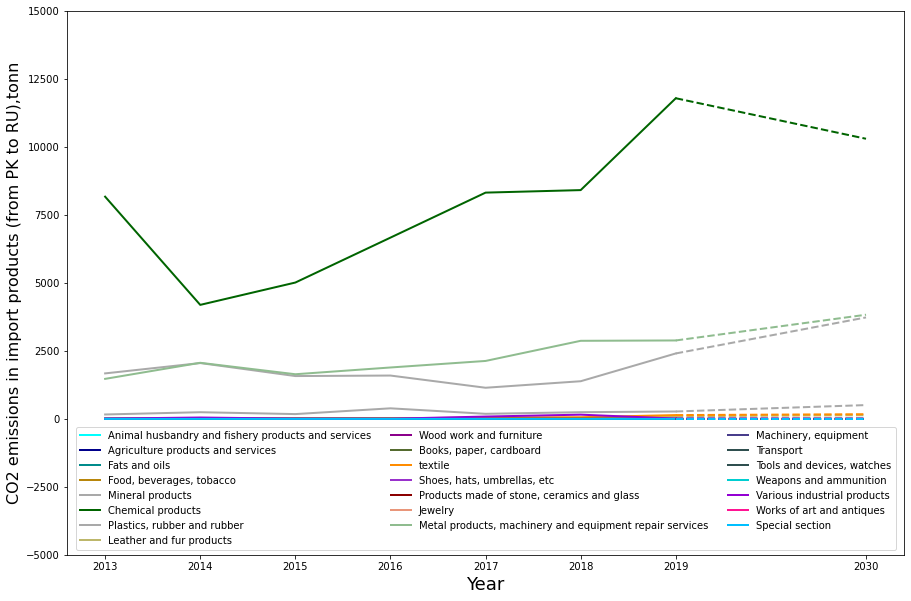

In [45]:
plt.figure(figsize=(15,10))
for num,el in enumerate(np.array(importCO2[range(2013,2020)])):
    plt.plot(range(2013,2020),el,linewidth=2,color=clrs[num])
for num,el in enumerate(np.array(importCO2[range(2013,2020)])):
    plt.plot([2019,2021],[el[-1],Imprt_CO2_2030_product[importCO2.index[num]]],'--',linewidth=2,color=clrs[num])
    
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.xticks(list(range(2013,2020))+[2021],list(range(2013,2020))+[2030])
plt.ylabel('CO2 emissions in import products (from PK to RU),tonn',fontsize=16)
plt.ylim(-0.5e4,1.5e4)
plt.show()

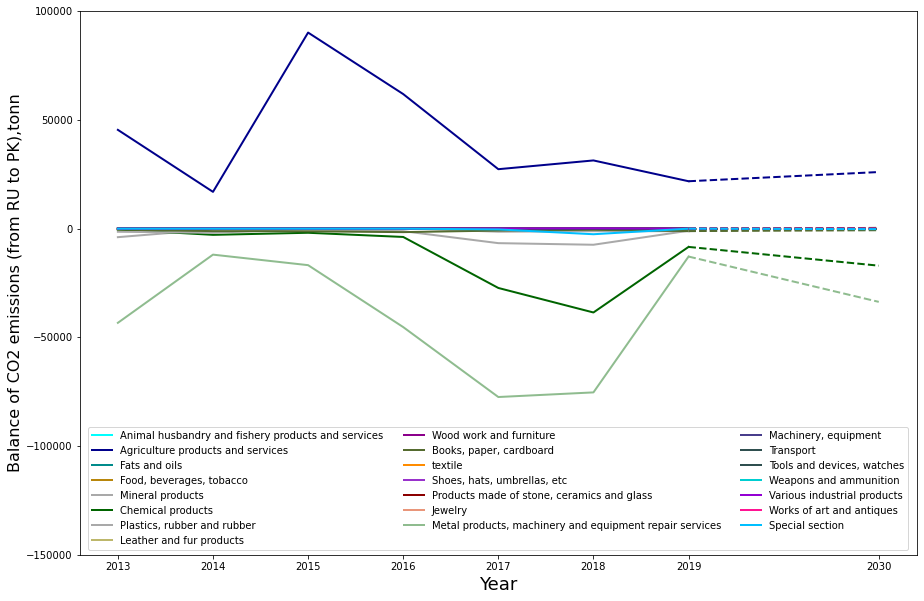

In [46]:
plt.figure(figsize=(15,10))
for num,el in enumerate(products):
    plt.plot(range(2013,2020),np.array(importCO2[range(2013,2020)].loc[num+1]-exportCO2[range(2013,2020)].loc[num+1]),
             linewidth=2,color=clrs[num])
for num,el in enumerate(products):
    plt.plot([2019,2021],[np.array(importCO2[range(2013,2020)].loc[num+1]-exportCO2[range(2013,2020)].loc[num+1])[-1],
                          Imprt_CO2_2030_product[importCO2.index[num]]-Exprt_CO2_2030_product[importCO2.index[num]]],
             '--',linewidth=2,color=clrs[num])
plt.xlabel('Year',fontsize=18)
plt.legend(products,ncol=3,loc='lower center')
plt.xticks(list(range(2013,2020))+[2021],list(range(2013,2020))+[2030])
plt.ylabel('Balance of CO2 emissions (from RU to PK),tonn',fontsize=16)
plt.ylim(-15e4,10e4)
plt.show()

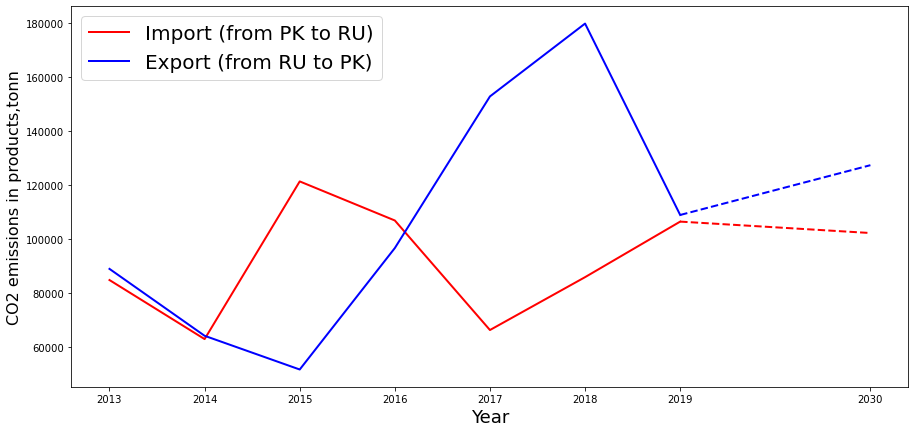

In [47]:
plt.figure(figsize=(15,7))
plt.plot(importCO2[range(2013,2020)].sum(),linewidth=2,color='red')
plt.plot(exportCO2[range(2013,2020)].sum(),linewidth=2,color='blue')
plt.plot([2019,2021],[importCO2[range(2013,2020)].sum()[2019],sum_Imprt_CO2_2030],'--',linewidth=2,color='red')
plt.plot([2019,2021],[exportCO2[range(2013,2020)].sum()[2019],sum_Exprt_CO2_2030],'--',linewidth=2,color='blue')
plt.xlabel('Year',fontsize=18)
plt.legend(['Import (from PK to RU)','Export (from RU to PK)'],fontsize=20)
plt.ylabel('CO2 emissions in products,tonn',fontsize=16)
plt.xticks(list(range(2013,2020))+[2021],list(range(2013,2020))+[2030])
plt.show()
                                                        


In [48]:
reader = codecs.getreader("utf-8")
f = urlopen('https://raw.githubusercontent.com/Kreozot/russian-geo-data/master/geo.json')
geometry = json.load(reader(f))
f.close()


In [51]:
len(import_r)

71

In [52]:
regs=[77,59,21,5,66,-1,22,60,23,1,76,0,6,7,8,55,9,70,56,78,51,53,67,27,74,58,-1,15,57,17,-1,19,25,26,28,72,29,61,62,21,30,32,
      -1,14,63,33,34,35,37,36,38,3,40,41,42,68,44,24,43,46,4,45,75,64,47,48,79,18,49,65,50,10,11,12,13,-1,54,69,73,71,2,16,52,
      20,39]
with open('export_r.json') as json_file:
    data = json.load(json_file)
nregs=list(data.keys())
np.array(list([[x[0],x[1]['properties']['NAME_1'],None if regs[x[0]]==-1 else nregs[regs[x[0]]]] for x in enumerate(geometry["features"])]))

array([[0, 'Karachay-Cherkess', 'Карачаево-Черкесская республика'],
       [1, 'Karelia', 'Карелия'],
       [2, 'Kemerovo', 'Кемеровская область'],
       [3, 'Khabarovsk', 'Хабаровский край'],
       [4, 'Khakass', 'Хакасия'],
       [5, 'Khanty-Mansiy', None],
       [6, 'Kirov', 'Кировская область'],
       [7, 'Komi', 'Коми'],
       [8, 'Kostroma', 'Костромская область'],
       [9, 'Krasnodar', 'Краснодарский край'],
       [10, 'Adygey', 'Адыгея'],
       [11, 'Altay', 'Алтайский край'],
       [12, 'Amur', 'Амурская область'],
       [13, "Arkhangel'sk", 'Архангельская область'],
       [14, "Astrakhan'", 'Астраханская область'],
       [15, 'Bashkortostan', 'Башкирия'],
       [16, 'Belgorod', 'Белгородская область'],
       [17, 'Bryansk', 'Брянская область'],
       [18, 'Buryat', 'Бурятия'],
       [19, 'Chechnya', 'Чеченская республика'],
       [20, 'Chelyabinsk', 'Челябинская область'],
       [21, 'Chukot', 'Чукотский АО'],
       [22, 'Chuvash', 'Чувашия'],
       [23

In [53]:
dfd.index=dfd.ID

In [54]:
CO2.index=CO2.ID

In [69]:
for el in nregs:
    export_r[el]=export_r.get(el,dict())
    import_r[el]=import_r.get(el,dict())
    imprt_predict[el]=imprt_predict.get(el,dict())
    exprt_predict[el]=exprt_predict.get(el,dict())
    for pr in range(22):
        export_r[el][pr+1]=export_r[el].get(pr+1,dict())
        import_r[el][pr+1]=import_r[el].get(pr+1,dict())
        imprt_predict[el][pr+1]=imprt_predict[el].get(pr+1,0)
        exprt_predict[el][pr+1]=exprt_predict[el].get(pr+1,0)



In [63]:
years=range(2013,2020)

for el in export_r:
    for pr in range(22):
        for yr in years:
            export_r[el][pr+1][yr]=export_r[el][pr+1].get(yr,0)
for el in import_r:
    for pr in range(22):
        for yr in years:
            import_r[el][pr+1][yr]=import_r[el][pr+1].get(yr,0)


In [64]:
def get_vals(cat,prd,reg,years):
    if regs[reg]==-1:
        return [0]*len(years)
    else:
        dde=pd.DataFrame(export_r[nregs[regs[reg]]]).T[years]*CO2[years]/dfd[years]
        ddi=pd.DataFrame(import_r[nregs[regs[reg]]]).T[years]*CO2[years]/dfd[years]
        if prd==-1:
            ddfe=dict(dde.sum())
            ddfi=dict(ddi.sum())
        else:
            ddfe=dict(dde.loc[prd])
            #export_r[nregs[regs[reg]]].get(prd,dict(zip(years,[0]*len(years))))
            ddfi=dict(ddi.loc[prd])
            #import_r[nregs[regs[reg]]].get(prd,dict(zip(years,[0]*len(years))))
        
        if cat=='export':
            return [ddfe.get(el,0) for el in years]
        elif cat=='import':
            return [ddfi.get(el,0) for el in years]
        else:
            return [ddfi.get(el,0)-ddfe.get(el,0) for el in years]

        
    

In [65]:
def get_pedict_vals(cat,prd,reg): #cat=export/import/balance, prd=-1 - all products / 0..21 - products
    if regs[reg]==-1:
        return 0
    else:
        expdf=exprt_predict[nregs[regs[reg]]]
        impdf=imprt_predict[nregs[regs[reg]]]
        for el in expdf:
            expdf[el]=0 if np.isnan(expdf[el]) else expdf[el]
        for el in impdf:
            impdf[el]=0 if np.isnan(impdf[el]) else impdf[el]
        se= np.sum(list(exprt_predict[nregs[regs[reg]]].values())) if prd==-1 else exprt_predict[nregs[regs[reg]]][prd]
        si= np.sum(list(imprt_predict[nregs[regs[reg]]].values())) if prd==-1 else imprt_predict[nregs[regs[reg]]][prd]
        return se if cat=='export' else si if cat=='import' else si-se
    


In [66]:
def get_map(cat='export',prd=-1,years=range(2013,2020)): #cat=export/import/balance, prd=-1 - all products / 0..21 - products
    df_rep=pd.DataFrame([[x[1]['properties']['NAME_1']]+get_vals(cat,prd,x[0],years) for x in enumerate(geometry["features"])],
             columns=['NAME_1']+list(years))
    df_rep.index=df_rep['NAME_1']
    df_rep['mean']=df_rep[df_rep.columns[1:]].mean(axis=1)
    df_rep[2030]=[get_pedict_vals(cat,prd,x[0]) for x in enumerate(geometry["features"])]

    return df_rep

In [67]:
def plot_map(df_rep,year='mean',title='',scale='log'):
    fig, ax = plt.subplots(figsize=(20,8))
    ppatches=[]
    ppatchesw=[]
    colors=[]
    iii=-1
    for feature in geometry['features']:
        nnn=feature['properties']['NAME_1']
        rrr=df_rep.loc[nnn][year]
        if feature['geometry']['type']=='Polygon':
            iii+=1
            pole=np.array(feature['geometry']['coordinates'][0]).T
        
            if len(pole.shape)!=2:
                pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
            if rrr!=0:
                ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                colors.append(rrr)
            else:
                ppatchesw.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                

        elif feature['geometry']['type']=='MultiPolygon':
            iii+=1
            for eel in np.array(feature['geometry']['coordinates']):
                for el in eel:
                    pole=np.array(el).T
                    pole[0]=np.array(list(map(lambda x: x if x>0 else x+360,pole[0])))
                    if len(pole.shape)!=2:
                        pole=np.array([np.array(pole[0]).T[0],np.array(pole[1]).T[0]])
                    if rrr!=0:
                        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
                        colors.append(rrr)
                    else:
                        ppatchesw.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))

        
        else:
            print (feature['properties']['NAME_1'])
    if scale=='log':
        p = PatchCollection(ppatches, edgecolor="#000000", alpha=1, cmap=matplotlib.cm.jet, norm=matplotlib.colors.LogNorm(), lw=0) #color="#25CDCD", 
    else:
        p = PatchCollection(ppatches, edgecolor="#000000", alpha=1, cmap=matplotlib.cm.jet) #color="#25CDCD", SymLogNorm
        
    p.set_array(np.array(colors))
    ax.add_collection(p)

    pp = PatchCollection(ppatchesw, color="#FFFFFF",edgecolor="#000000", alpha=0.5) #color="#25CDCD", 
    ax.add_collection(pp)
    
    
    
    plt.colorbar(p)
    #ax.add_collection(p)
    ax.set_xlim((20,195))
    ax.set_ylim((40,85))
    plt.title(title,fontsize=20)
    plt.show()

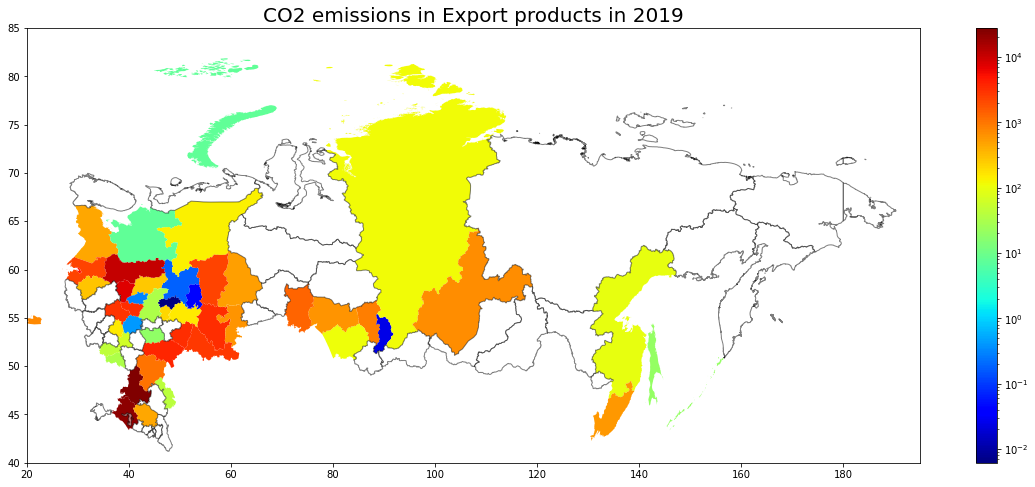

In [70]:
dfr=get_map(cat='export')
plot_map(dfr,year=2019,title='CO2 emissions in Export products in 2019')

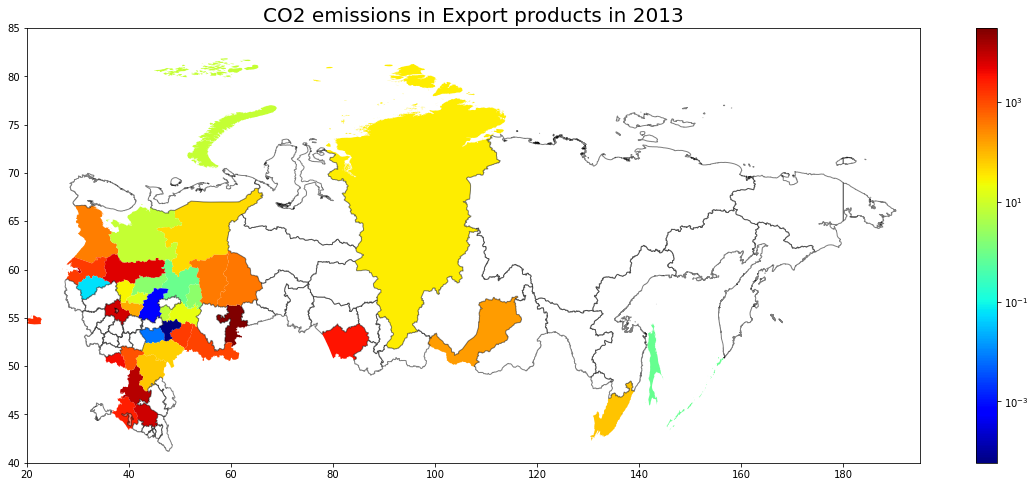

In [71]:
dfr=get_map(cat='export')
plot_map(dfr,year=2013,title='CO2 emissions in Export products in 2013')

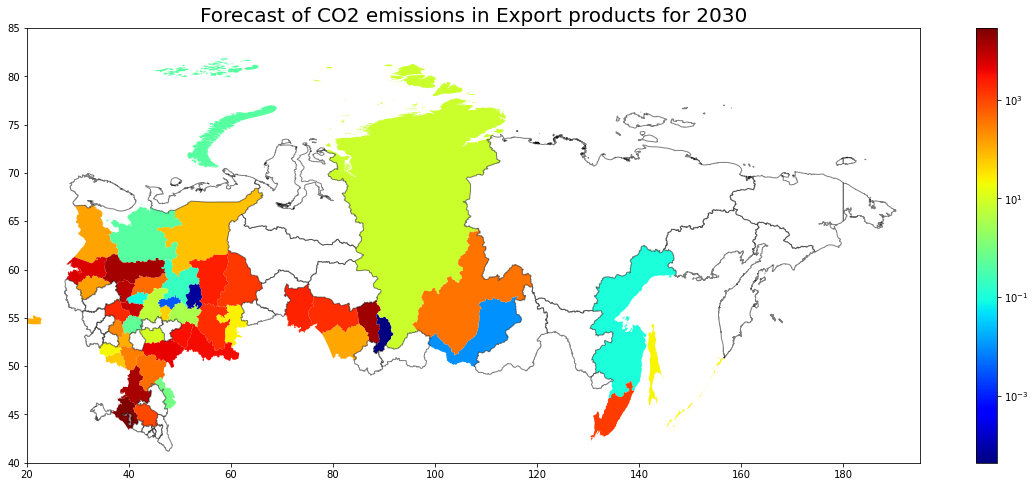

In [72]:
dfr=get_map(cat='export')
plot_map(dfr,year=2030,title='Forecast of CO2 emissions in Export products for 2030')

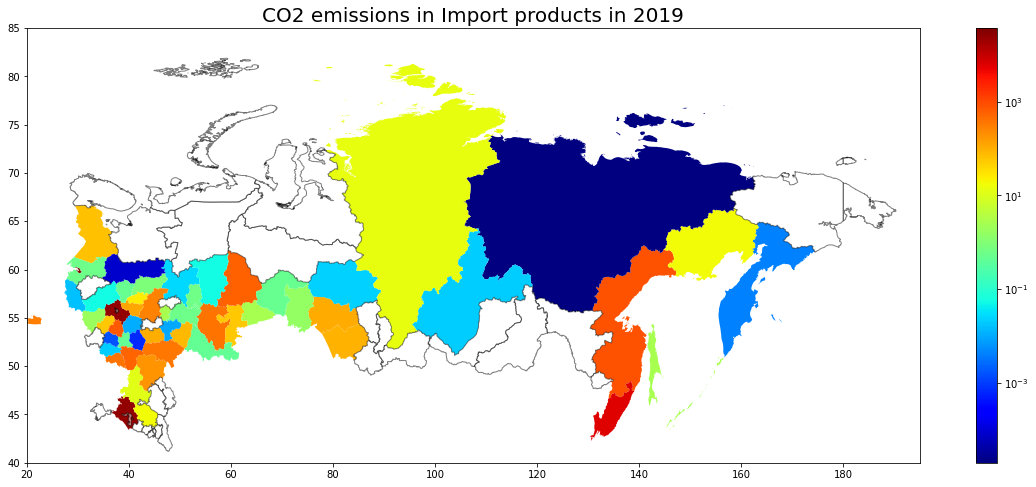

In [73]:
dfr=get_map(cat='import')
plot_map(dfr,year=2019,title='CO2 emissions in Import products in 2019')


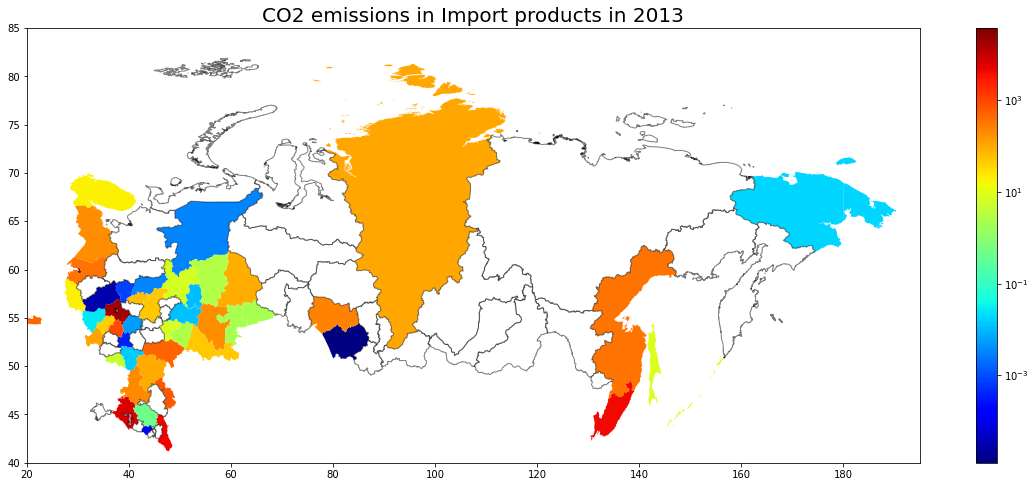

In [74]:
dfr=get_map(cat='import')
plot_map(dfr,year=2013,title='CO2 emissions in Import products in 2013')


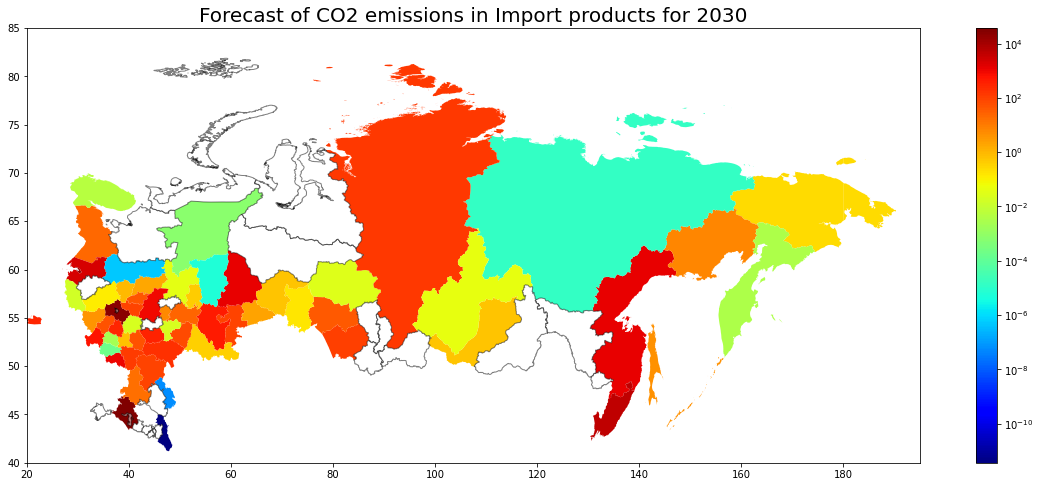

In [75]:
dfr=get_map(cat='import')
plot_map(dfr,year=2030,title='Forecast of CO2 emissions in Import products for 2030')

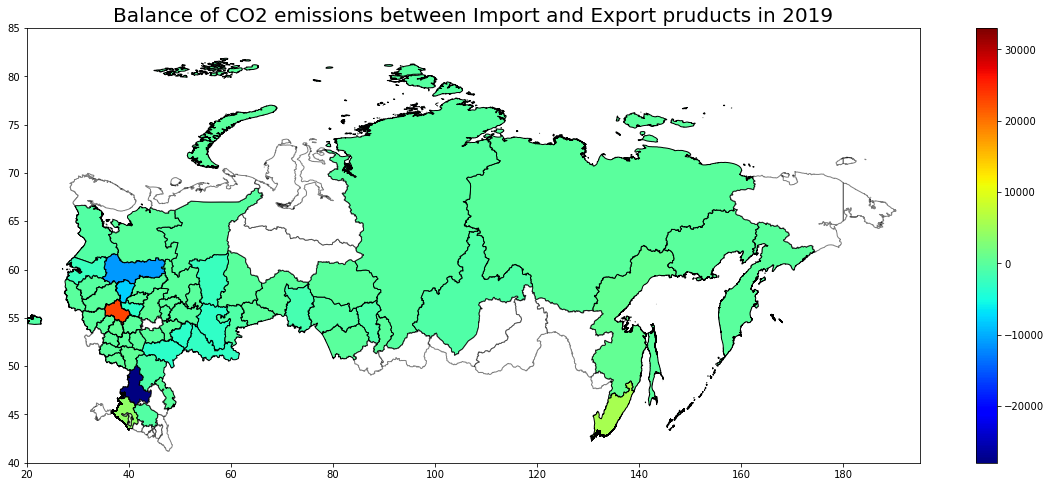

In [76]:
dfr=get_map(cat='balance')
plot_map(dfr,year=2019,title='Balance of CO2 emissions between Import and Export pruducts in 2019',scale='norm')


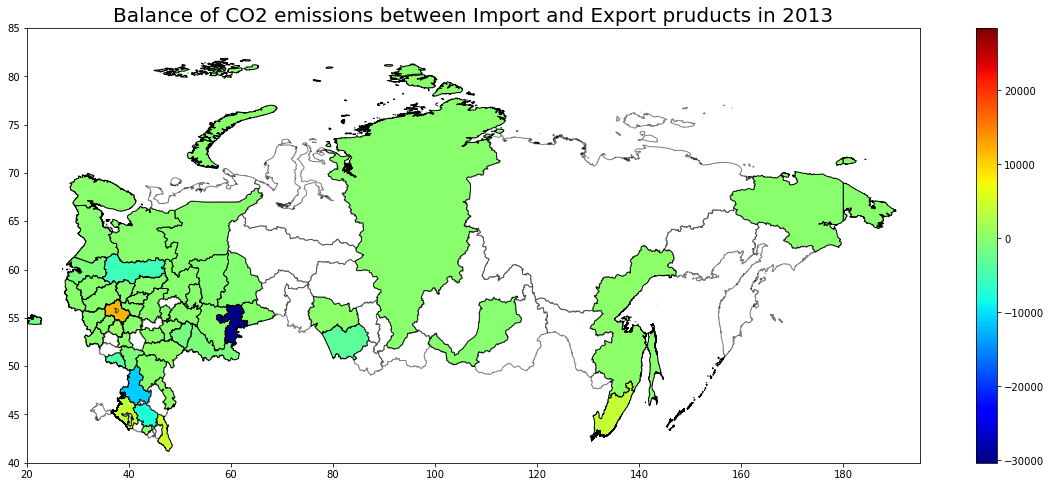

In [77]:
dfr=get_map(cat='balance')
plot_map(dfr,year=2013,title='Balance of CO2 emissions between Import and Export pruducts in 2013',scale='norm')


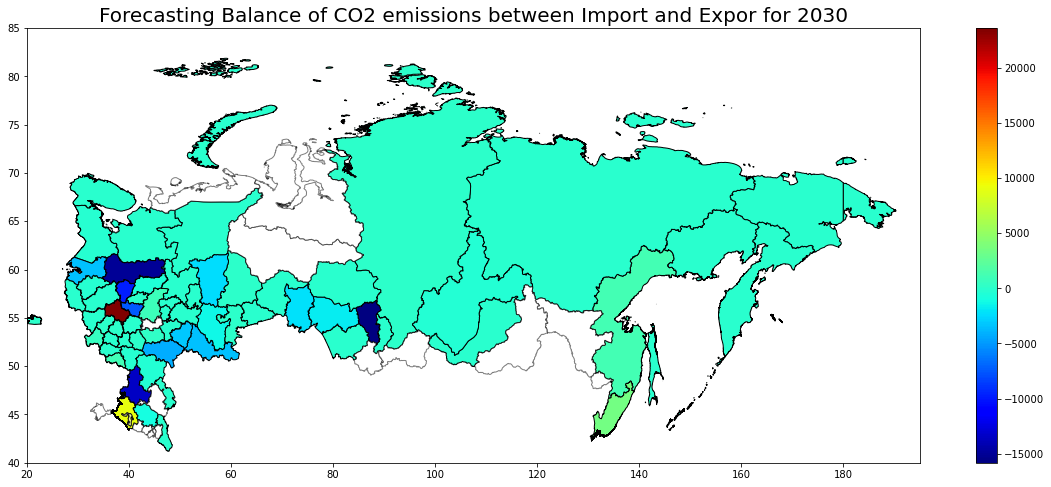

In [78]:
dfr=get_map(cat='balance')
plot_map(dfr,year=2030,title='Forecasting Balance of CO2 emissions between Import and Expor for 2030',scale='norm')


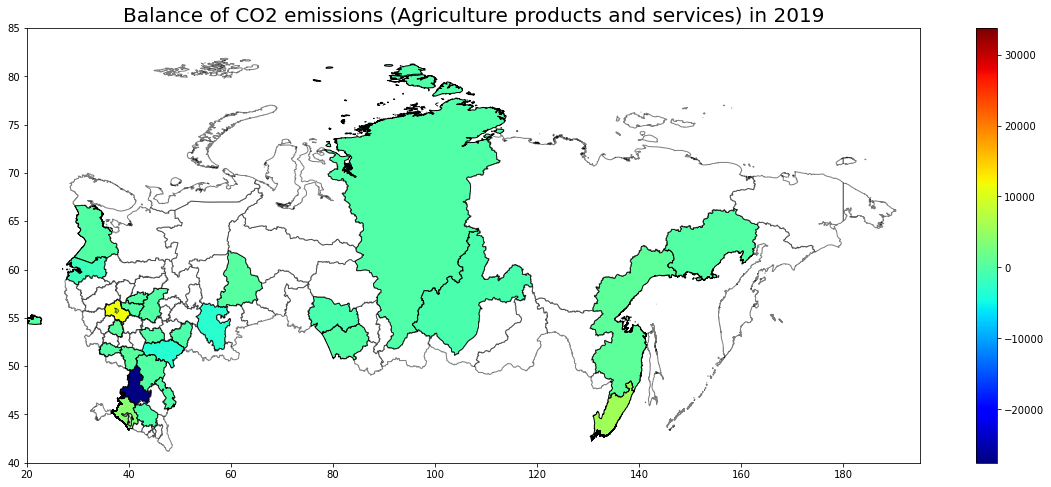

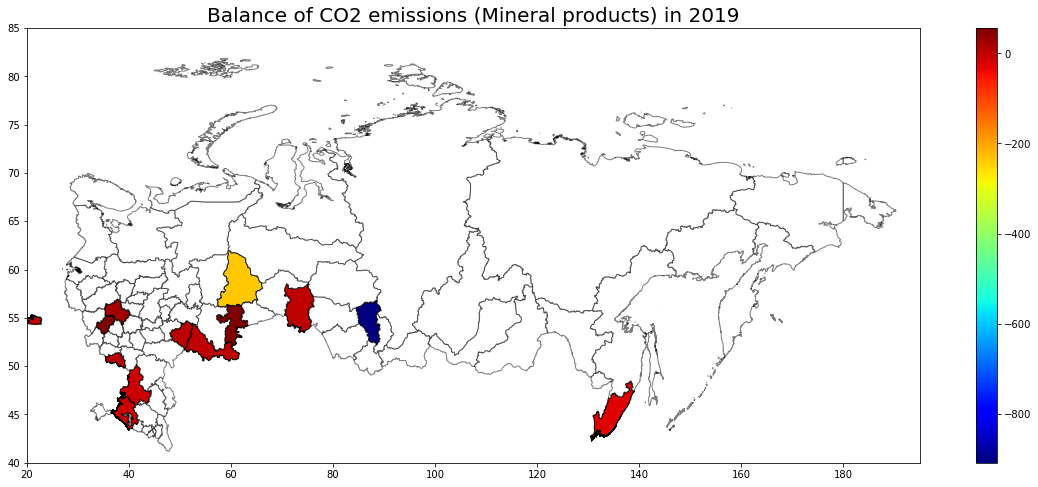

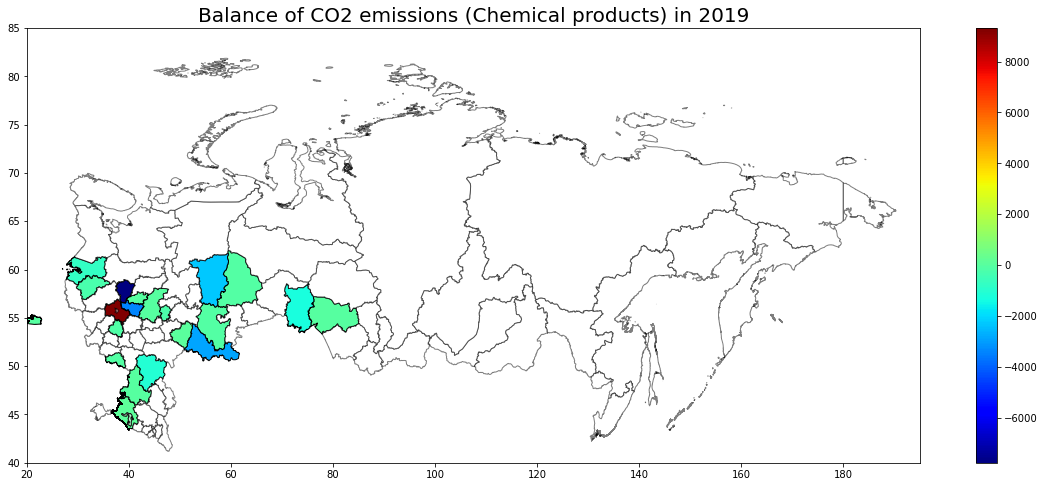

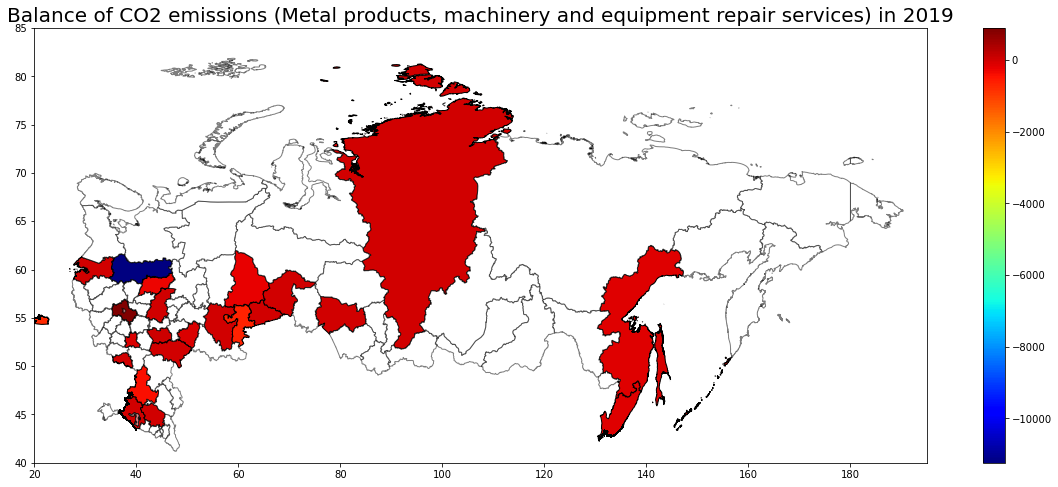

In [85]:
for el in [2,5,6,15]:
    dfr=get_map(cat='balance',prd=el)
    plot_map(dfr,year=2019,title='Balance of CO2 emissions ('+products[el-1]+') in 2019',scale='norm')


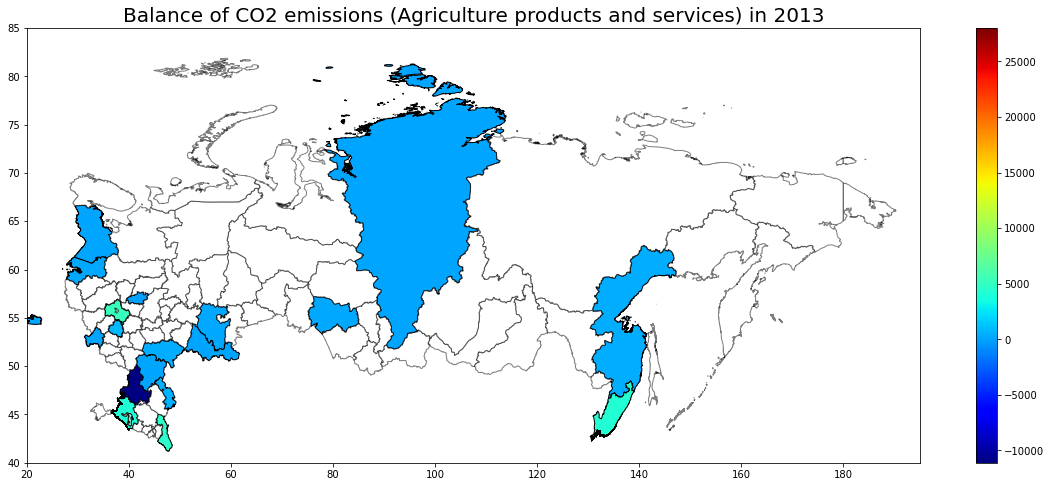

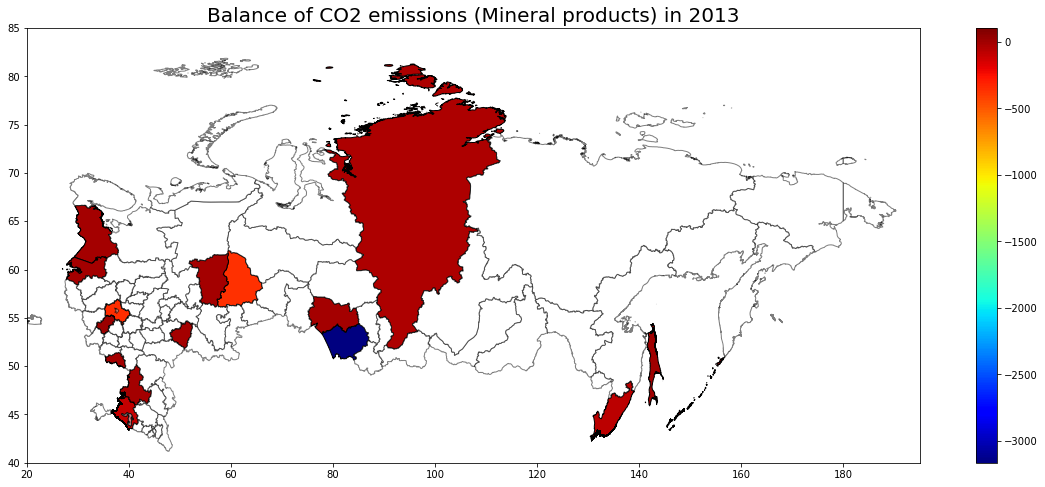

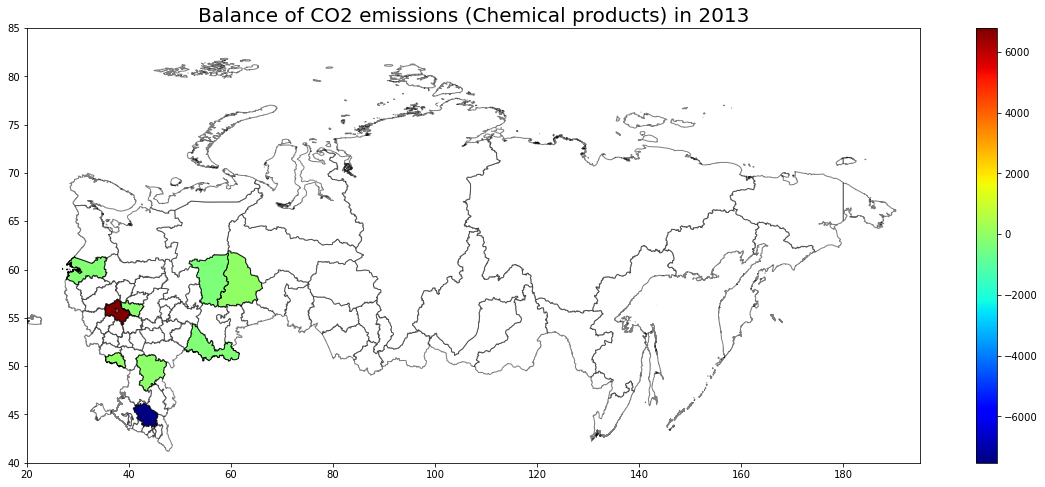

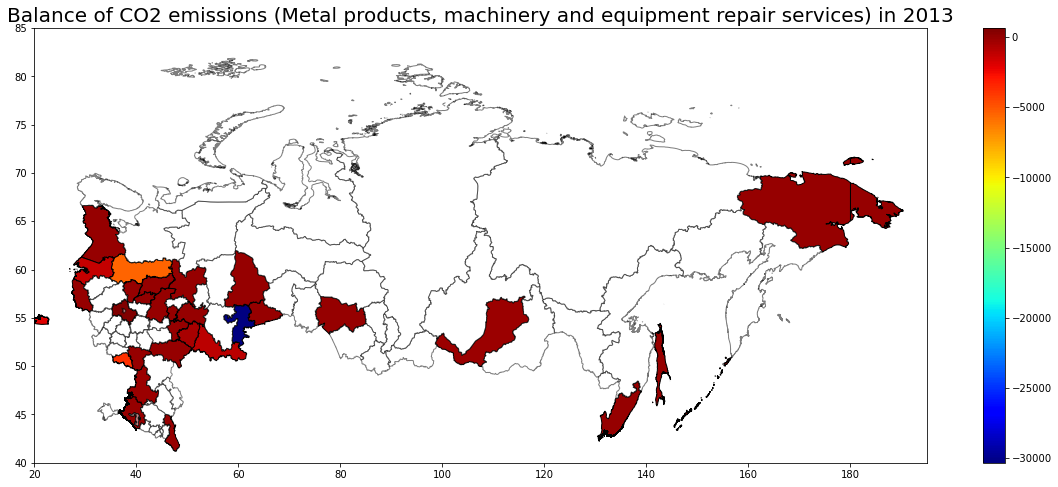

In [86]:
for el in [2,5,6,15]:
    dfr=get_map(cat='balance',prd=el)
    plot_map(dfr,year=2013,title='Balance of CO2 emissions ('+products[el-1]+') in 2013',scale='norm')


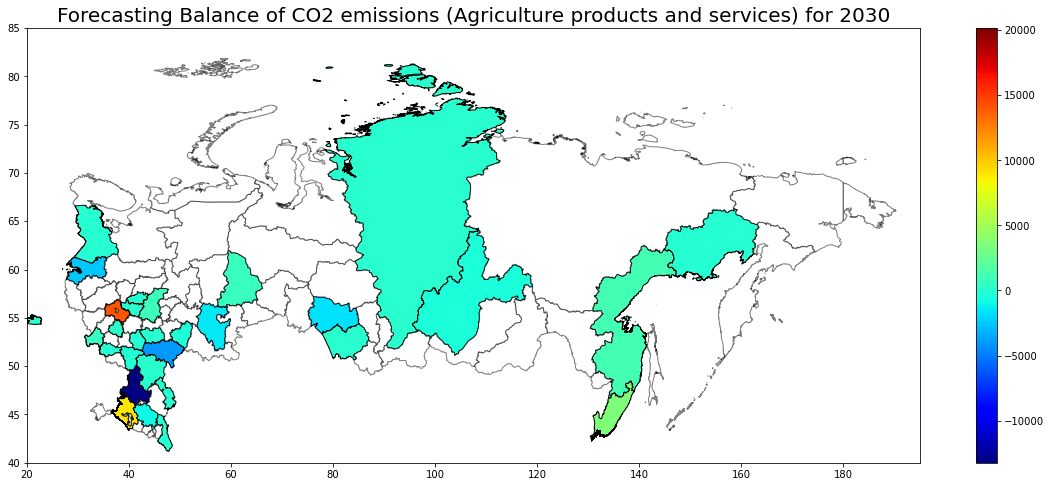

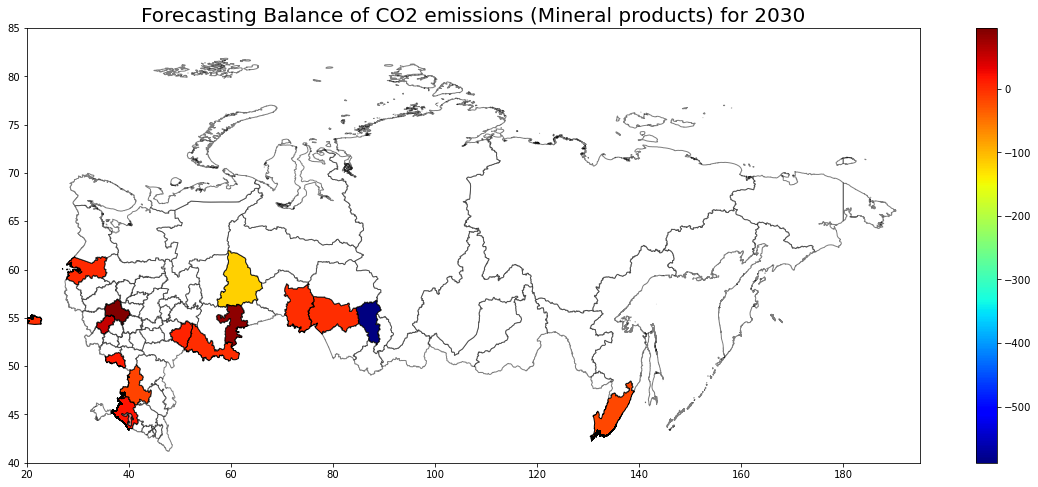

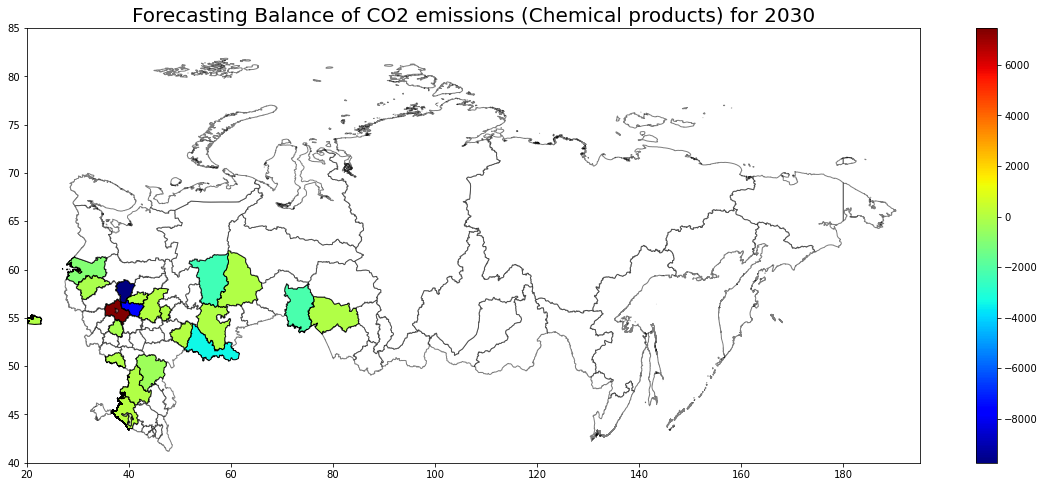

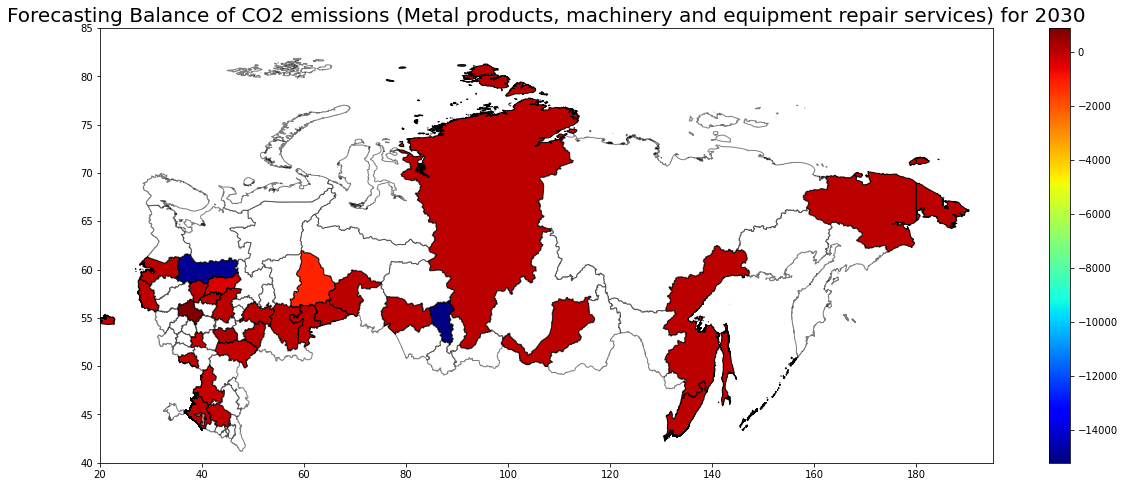

In [87]:
for el in [2,5,6,15]:
    dfr=get_map(cat='balance',prd=el)
    plot_map(dfr,year=2030,title='Forecasting Balance of CO2 emissions ('+products[el-1]+') for 2030',scale='norm')
